# NLP - Words Cloud

Displays a list of words and the importance or the frequency of each word is depicted by the word size and color.

Word clouds are widely used for analyzing data from social networks.

* c:\users\<USERNAME>\appdata\local\programs\python\python36\python.exe -m pip install wordcloud

In [1]:
# MAKE SURE YOU'RE RUNNING PYTHON36
# Then install wordcloud with that path (you're using 2 versions of Python maybe).

import sys
print(sys.executable)

c:\users\vixen\appdata\local\programs\python\python36\python.exe


In [2]:
import numpy as np
import pandas as pd

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t')

data.shape

(3150, 5)

In [4]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


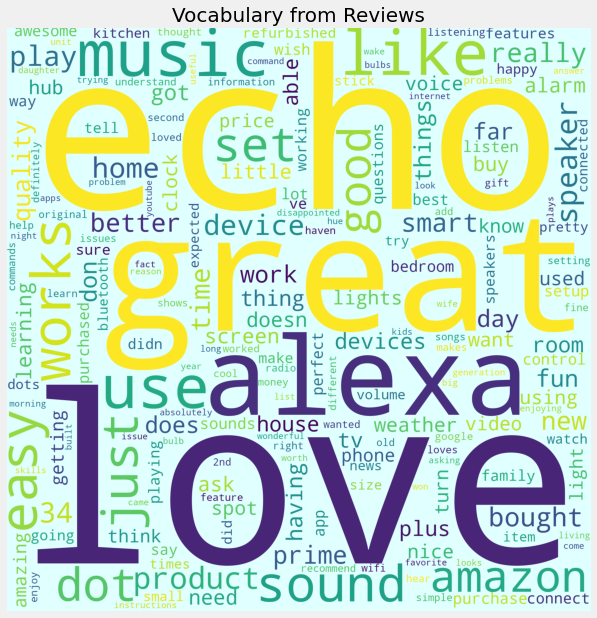

In [5]:
# plot the Wordscloud

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()